In [90]:
def CP_Diff_Class(X,Y,xt):
    if len(X) == len(Y): #check if Samples and labels have same length
        labels = list(set(Y)) #Finding out the distinct Labels to assign
        
        predicted_labels = [] #will store the predicted label
        pred_label_conformity_score = []  #stores higher pvalue scores
        other_label_conformity_score = [] #stores lower pvalue scores
        
        for b in range(len(xt)): #Looping through all the test samples
            test = xt[b]  #taking 1 test sample at a time
            
            scores_for_both_classes = [] #stores the pvalues (Here for -1 and +1)
            return_labels = [] #consists of labels (Here -1,+1)
            
            for k in range(len(labels)): #Loop to iterate through labels (Here +1 and -1)
                    x =  X.copy() #Create Copy of X-train
                    y =  Y.copy() #Create Copy of Y-train
                    conformity_scores = [] # to store nearest distance to different class
                    distance_array = [] # to store all distances

                    x.append(test) # Create an Augmented Training Set
                    y.append(labels[k]) #Create Augmented set using a label to consider

                    for i in range(len(x)): #loop to find distances from different classes
                        a1 = x[i][0] #take point 1 from tuple of (point1,point2)
                        b1 = x[i][1] #take point 2 from tuple of (point1,point2)

                        for j in range(len(x)): #looping through all the points
                            if j!=i:  # check its not the same sample
                                if y[i] != y[j]: #check if it has a different label
                                    a2 = x[j][0]
                                    b2 = x[j][1]
                                    t1 = (a1-a2)**2
                                    t2 = (b1-b2)**2
                                    d = np.sqrt(t1+t2) # calculations to find Euclidean Distance
                                    distance_array.append(d) #append each distance to different class in this array
                                    
                        conformity_scores.append(min(distance_array)) #append nearest Distance to array using "min"
                        distance_array.clear() #reset distance array to store next set of distances
                    
                    #After this loop we have all the nearest distances to different class in conformity_scores array
                    
                    test_sample_score = conformity_scores[len(x)-1] #take the test sample's score in a variable
                    conformity_scores.sort(reverse=True) #Sort in Descending Order to calculate rank pessimistically
                    
                    for rank in range(len(conformity_scores)): # loop to find rank
                        if conformity_scores[rank]==test_sample_score:
                            break

                    rank = len(x)-rank #Logic for Pessimistic Approach to find Rank
                    p_value = (rank)/len(x) #formula for p_value
                    
                    scores_for_both_classes.append(p_value) #stores pvalue for all the labels (Here +1 and -1)
                    return_labels.append(labels[k]) #stores corresponding labels

            index_max = np.argmax(scores_for_both_classes) #getting index of higher pvalue
            index_min = np.argmin(scores_for_both_classes) #getting index of lower pvalue
            
            predicted_labels.append(return_labels[index_max])  #stores predicted label
            pred_label_conformity_score.append(scores_for_both_classes[index_max]) #stores higher pvalue
            other_label_conformity_score.append(scores_for_both_classes[index_min]) #stores lower pvalue
            
        return predicted_labels,pred_label_conformity_score,other_label_conformity_score
    else:
        return "Error:Size of Samples and Labels mismatched"

In [91]:
def CP_DiffBySame(X,Y,xt):
    if len(X) == len(Y): #check if Samples and labels have same length
        labels = list(set(Y)) #Finding out the distinct Labels to assign
        
        predicted_labels = [] #will store the predicted label
        pred_label_conformity_score = []  #stores higher pvalue scores
        other_label_conformity_score = [] #stores lower pvalue scores

        for b in range(len(xt)): #Looping through all the test samples
            test = xt[b]  #taking 1 test sample at a time
            
            scores_for_both_classes = [] #stores the pvalues (Here for -1 and +1)
            return_labels = [] #consists of labels (Here -1,+1)
            
            for k in range(len(labels)): #Loop to iterate through labels (Here +1 and -1)
                    x =  X.copy() #Create Copy of X-train
                    y =  Y.copy() #Create Copy of Y-train
                    
                    diff_class = [] #to store nearest distances to different classes
                    same_class = [] #to store nearest distances to same classes
                    
                    conformity_scores = [] #to store diff/same class calculations

                    x.append(test) # Create an Augmented Training Set
                    y.append(labels[k]) #Create Augmented set using a label to consider

                    for i in range(len(x)): #loop to find distances from different classes
                        a1 = x[i][0] #take point 1 from tuple of (point1,point2)
                        b1 = x[i][1] #take point 2 from tuple of (point1,point2)
                        distance_array1 = [] #to store all distances to different class
                        distance_array2 = [] #to store all distances to different class
                        for j in range(len(x)): #looping through all the points
                            if j!=i: #check its not the same point
                                a2 = x[j][0]
                                b2 = x[j][1]
                                t1 = (a1-a2)**2
                                t2 = (b1-b2)**2
                                d = np.sqrt(t1+t2) # formula to find Euclidean Distances   
                                if y[i] != y[j]: #check if it is different class
                                    distance_array1.append(d) #storing Different Classes Distances
                                else: #else it is same class
                                    distance_array2.append(d) #storing Same Classes Distances

                        diff_class.append(min(distance_array1)) #stores Nearest Distance to Different Class
                        same_class.append(min(distance_array2)) #stores Nearest Distance to Same Class

                    for r in range(len(same_class)):  #remove zero values
                        if same_class[r] == 0:
                            same_class[r] = 0.00001
                            
                    #Logic to calculate find Diff/Same Scores
                    conformity_scores = [ p/q for p,q in zip(diff_class,same_class) ]   

                    test_sample_score = conformity_scores[len(x)-1]
                    conformity_scores.sort(reverse=True) #Sort in Descending Order to Calculate rank Pessimistically
                    
                    for rank in range(len(x)): #Loop to find the rank
                        if conformity_scores[rank]==test_sample_score:
                            break

                    rank = len(x)-rank #Logic for Pessimistic Approach to find Rank
                    p_value = (rank)/len(x) #formula for p_value
                    
                    scores_for_both_classes.append(p_value) #stores pvalue for all the labels (Here +1 and -1)
                    return_labels.append(labels[k]) #stores corresponding labels

            index_max = np.argmax(scores_for_both_classes) #getting index of higher pvalue
            index_min = np.argmin(scores_for_both_classes) #getting index of lower pvalue
            
            predicted_labels.append(return_labels[index_max])  #stores predicted label
            pred_label_conformity_score.append(scores_for_both_classes[index_max]) #stores higher pvalue
            other_label_conformity_score.append(scores_for_both_classes[index_min]) #stores lower pvalue
 
        return predicted_labels,pred_label_conformity_score,other_label_conformity_score
    else:
        return "Error:Size of Samples and Labels mismatched"
    

# Program to Create Artificial Data

In [92]:
import numpy as np, random
random.seed(3)
x_train_positive,x_train_negative,x_test_positive,x_test_negative=[],[],[],[]

x_m, y_m, s = 2,3,1
for i in range(60):
        x1 = x_m + s*np.random.normal(0,1)
        x2 = y_m + s*np.random.normal(0,1)
        x_train_positive.append((x1,x2))

x_m, y_m, s = 0,0,2
for i in range(70):
        x1 = x_m + s*np.random.normal(0,1)
        x2 = y_m + s*np.random.normal(0,1)
        x_train_negative.append((x1,x2))
    
x_m, y_m, s = 2,3,1
for i in range(70):
        x1 = x_m + s*np.random.normal(0,1)
        x2 = y_m + s*np.random.normal(0,1)
        x_test_positive.append((x1,x2))


x_m, y_m, s = 0,0,2
for i in range(60):
        x1 = x_m + s*np.random.normal(0,1)
        x2 = y_m + s*np.random.normal(0,1)
        x_test_negative.append((x1,x2))
        
x_train = x_train_positive + x_train_negative
y_train = len(x_train_positive)*[+1] + len(x_train_negative)*[-1]
t = list(zip(x_train, y_train))
random.shuffle(t)
x_train, y_train = zip(*t)
#Here our x_train and y_train Data is ready

x_test = x_test_positive + x_test_negative
y_test = len(x_test_positive)*[+1] + len(x_test_negative)*[-1]
t = list(zip(x_test, y_test))
random.shuffle(t)
x_test, y_test = zip(*t)
#Here our x_test and y_test Data is ready

x_train = list(x_train)
y_train = list(y_train)
x_test = list(x_test)
y_test = list(y_test)

In [93]:
out1 = CP_Diff_Class(x_train,y_train,x_test)
out2 = CP_DiffBySame(x_train,y_train,x_test)

# Accuracy Test 

In [94]:
def Accuracy(y_pred,y_test):
    count = 0
    for i in range(len(y_pred)):
        if(y_pred[i]==y_test[i]):
            count+=1
    return (count/len(y_pred))*100
print("Accuracy using Diff/Same Class is: ",Accuracy(out1[0],y_test))
print("Accuracy using Different Class is: ",Accuracy(out2[0],y_test))


Accuracy using Diff/Same Class is:  83.84615384615385
Accuracy using Different Class is:  83.84615384615385


# Validity Check

In [95]:
def Validity(output):
    y_pred,p_values,other_pvalues = output[0],output[1],output[2]
    p_true = [] #True label of Y's Pvalue
    for i in range(len(y_pred)):
        if y_test[i] == y_pred[i]:
            p_true.append(p_values[i])   
        else:
            p_true.append(other_pvalues[i])
    return sum(p_true)/len(p_true)

print("Validity for Different Class method is: ",Validity(out1))
print("Validity for Different/Same Class method is: ",Validity(out2))

Validity for Different Class method is:  0.46811509101585425
Validity for Different/Same Class method is:  0.440281855549031


# Efficiency Test 

In [96]:
def Efficiency(output):
    pvalues, other_pvalues = output[1], output[2]
    s = [x + y for x, y in zip(pvalues, other_pvalues)]
    return sum(s)/len(pvalues)

print("Efficiency for Different Class method is: ",Efficiency(out1))
print("Efficiency for Diff/Same Class method is: ",Efficiency(out2))

Efficiency for Different Class method is:  0.6285378743394009
Efficiency for Diff/Same Class method is:  0.5065179095713447


#  Set Seed Value testing

In [97]:
import numpy as np, random, math, sys
from termcolor import colored, cprint

set_seeds,Acc_1,Acc_2,Val_1,Val_2,Eff_1,Eff_2,Acc_1_avg,Acc_2_avg,Val_1_avg,Val_2_avg,Eff_1_avg,Eff_2_avg = ([] for i in range(13))

for it in range(10):
    random.seed(it)
    set_seeds.append(it)
    x_train_positive,x_train_negative,x_test_positive,x_test_negative=[],[],[],[]

    x_m, y_m, s = 2,3,1
    for i in range(60):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_train_positive.append((x1,x2))

    x_m, y_m, s = 0,0,2
    for i in range(70):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_train_negative.append((x1,x2))

    x_m, y_m, s = 2,3,1
    for i in range(70):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_test_positive.append((x1,x2))


    x_m, y_m, s = 0,0,2
    for i in range(60):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_test_negative.append((x1,x2))

    x_train = x_train_positive + x_train_negative
    y_train = len(x_train_positive)*[+1] + len(x_train_negative)*[-1]
    t = list(zip(x_train, y_train))
    random.shuffle(t)
    x_train, y_train = zip(*t)

    x_test = x_test_positive + x_test_negative
    y_test = len(x_test_positive)*[+1] + len(x_test_negative)*[-1]
    t = list(zip(x_test, y_test))
    random.shuffle(t)
    x_test, y_test = zip(*t)
    x_train, y_train, x_test, y_test = list(x_train), list(y_train), list(x_test), list(y_test)

    out1 = CP_Diff_Class(x_train,y_train,x_test)
    A1 = Accuracy(out1[0],y_test)
    Acc_1_avg.append(A1)
    if(A1>=80): A1 = colored(A1, 'green', attrs=['reverse', 'blink'])
    elif((A1>=60) & (A1<80)): A1 = colored(A1, 'yellow', attrs=['reverse', 'blink'])
    else: A1 = colored(A1, 'red', attrs=['reverse', 'blink'])
    Acc_1.append(A1)

    out2 = CP_DiffBySame(x_train,y_train,x_test)
    A2 = Accuracy(out2[0],y_test)
    Acc_2_avg.append(A2)
    if(A2>=80): A2 = colored(A2, 'green', attrs=['reverse', 'blink'])
    elif((A2>=60) & (A2<80)): A2 = colored(A2, 'yellow', attrs=['reverse', 'blink'])
    else: A2 = colored(A2, 'red', attrs=['reverse', 'blink'])
    Acc_2.append(A2)

    v1 = Validity(CP_Diff_Class(x_train,y_train,x_test))
    Val_1_avg.append(v1)
    if(v1>=0.48): v1 = colored(v1, 'green', attrs=['reverse', 'blink'])
    else: v1 = colored(v1, 'red', attrs=['reverse', 'blink'])
    Val_1.append(v1)

    v2 = Validity(CP_DiffBySame(x_train,y_train,x_test))
    Val_2_avg.append(v2)
    if(v2>=0.48): v2 = colored(v2, 'green', attrs=['reverse', 'blink'])
    else: v2 = colored(v2, 'red', attrs=['reverse', 'blink'])
    Val_2.append(v2)

    E1 = Efficiency(CP_Diff_Class(x_train,y_train,x_test))
    Eff_1_avg.append(E1)
    if(E1>=0.75): E1 = colored(E1, 'red', attrs=['reverse', 'blink'])
    elif((E1<0.75) & (E1>=0.65)): E1 = colored(E1, 'yellow', attrs=['reverse', 'blink'])
    else: E1 = colored(E1, 'green', attrs=['reverse', 'blink'])
    Eff_1.append(E1)

    E2 = Efficiency(CP_DiffBySame(x_train,y_train,x_test))
    Eff_2_avg.append(E2)
    if(E2>=0.75): E2 = colored(E2, 'red', attrs=['reverse', 'blink'])
    elif((E2<0.75) & (E2>=0.65)): E2 = colored(E2, 'yellow', attrs=['reverse', 'blink'])
    else: E2 = colored(E2, 'green', attrs=['reverse', 'blink'])
    Eff_2.append(E2)    

set_seeds.append("Average")
Acc_1.append(sum(Acc_1_avg)/len(Acc_1_avg))
Acc_2.append(sum(Acc_2_avg)/len(Acc_2_avg))
Val_1.append(sum(Val_1_avg)/len(Val_1_avg))
Val_2.append(sum(Val_2_avg)/len(Val_2_avg))
Eff_1.append(sum(Eff_1_avg)/len(Eff_1_avg))
Eff_2.append(sum(Eff_2_avg)/len(Eff_2_avg))    

In [98]:
from tabulate import tabulate
print("\nObservation Table:")
print("1 stands for Method 1: Nearest Neighbours to Different Class")
print("2 stands for Method 2: Nearest Neighbours to Diff/Same Class\n")

print(tabulate({'Seed Values': set_seeds, 'Accuracy1': Acc_1,
                'Accuracy2': Acc_2, 'Validity1': Val_1, 'Validity2': Val_2,
               'Efficiency1': Eff_1, 'Efficiency2': Eff_2}, headers="keys", tablefmt='fancy_grid', numalign='center'))


Observation Table:
1 stands for Method 1: Nearest Neighbours to Different Class
2 stands for Method 2: Nearest Neighbours to Diff/Same Class

╒═══════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═══════════════╤═══════════════╕
│ Seed Values   │  Accuracy1  │  Accuracy2  │  Validity1  │  Validity2  │  Efficiency1  │  Efficiency2  │
╞═══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═══════════════╪═══════════════╡
│ 0             │   82.3077   │   82.3077   │  0.444568   │  0.479213   │   0.656019    │   0.594363    │
├───────────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────────┼───────────────┤
│ 1             │   81.5385   │   81.5385   │  0.482149   │  0.494656   │   0.678215    │    0.6431     │
├───────────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────────┼───────────────┤
│ 2             │   86.9231   │   86.1538   │  0.498356   │  0.518144   │   0.713036    │   0.623429    │
├────────

# Introducing noise to data 

In [99]:
Noise,Acc_1,Acc_2,Val_1,Val_2,Eff_1,Eff_2= ([] for i in range(7))

for it in range(1,10):
    random.seed(3)
    Noise.append(it)
    x_train_positive,x_train_negative,x_test_positive,x_test_negative=[],[],[],[]

    x_m, y_m, s = 2,3,1
    for i in range(60):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_train_positive.append((x1,x2))

    x_m, y_m, s = 0,0,2
    for i in range(70):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_train_negative.append((x1,x2))

    x_m, y_m, s = 2,3,1
    for i in range(70):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_test_positive.append((x1,x2))


    x_m, y_m, s = 0,0,2
    for i in range(60):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_test_negative.append((x1,x2))

    x_train = x_train_positive + x_train_negative
    y_train = len(x_train_positive)*[+1] + len(x_train_negative)*[-1]
    t = list(zip(x_train, y_train))
    random.shuffle(t)
    x_train, y_train = zip(*t)

    x_test = x_test_positive + x_test_negative
    y_test = len(x_test_positive)*[+1] + len(x_test_negative)*[-1]
    t = list(zip(x_test, y_test))
    random.shuffle(t)
    x_test, y_test = zip(*t)

    x_train, y_train, x_test, y_test = list(x_train), list(y_train), list(x_test), list(y_test)

    out1 = CP_Diff_Class(x_train,y_train,x_test)
    A1 = Accuracy(out1[0],y_test)
    if(A1>=80): A1 = colored(A1, 'green', attrs=['reverse', 'blink'])
    elif((A1>=60) & (A1<80)): A1 = colored(A1, 'yellow', attrs=['reverse', 'blink'])
    else: A1 = colored(A1, 'red', attrs=['reverse', 'blink'])
    Acc_1.append(A1)

    out2 = CP_DiffBySame(x_train,y_train,x_test)
    A2 = Accuracy(out2[0],y_test)
    if(A2>=80): A2 = colored(A2, 'green', attrs=['reverse', 'blink'])
    elif((A2>=60) & (A2<80)): A2 = colored(A2, 'yellow', attrs=['reverse', 'blink'])
    else: A2 = colored(A2, 'red', attrs=['reverse', 'blink'])
    Acc_2.append(A2)

    v1 = Validity(CP_Diff_Class(x_train,y_train,x_test))
    if(v1>=0.48): v1 = colored(v1, 'green', attrs=['reverse', 'blink'])
    else: v1 = colored(v1, 'red', attrs=['reverse', 'blink'])
    Val_1.append(v1)

    v2 = Validity(CP_DiffBySame(x_train,y_train,x_test))
    if(v2>=0.48): v2 = colored(v2, 'green', attrs=['reverse', 'blink'])
    else: v2 = colored(v2, 'red', attrs=['reverse', 'blink'])
    Val_2.append(v2)


    E1 = Efficiency(CP_Diff_Class(x_train,y_train,x_test))
    if(E1>=0.75): E1 = colored(E1, 'red', attrs=['reverse', 'blink'])
    elif((E1<0.75) & (E1>=0.65)): E1 = colored(E1, 'yellow', attrs=['reverse', 'blink'])
    else: E1 = colored(E1, 'green', attrs=['reverse', 'blink'])
    Eff_1.append(E1)

    E2 = Efficiency(CP_DiffBySame(x_train,y_train,x_test))
    if(E2>=0.75): E2 = colored(E2, 'red', attrs=['reverse', 'blink'])
    elif((E2<0.75) & (E2>=0.65)): E2 = colored(E2, 'yellow', attrs=['reverse', 'blink'])
    else: E2 = colored(E2, 'green', attrs=['reverse', 'blink'])
    Eff_2.append(E2)

In [100]:
from tabulate import tabulate
print("\nObservation Table after Introducing Noise to X_test(-1 Class):")
print("1 stands for Method 1: Nearest Neighbours to Different Class")
print("2 stands for Method 2: Nearest Neighbours to Diff/Same Class\n")


print(tabulate({'Noise': Noise, 'Accuracy1': Acc_1,
                'Accuracy2': Acc_2, 'Validity1': Val_1, 'Validity2': Val_2,
               'Efficiency1': Eff_1, 'Efficiency2': Eff_2}, headers="keys", tablefmt='fancy_grid', numalign='center'))


Observation Table after Introducing Noise to X_test(-1 Class):
1 stands for Method 1: Nearest Neighbours to Different Class
2 stands for Method 2: Nearest Neighbours to Diff/Same Class

╒═════════╤═════════════╤═════════════╤═════════════╤═════════════╤═══════════════╤═══════════════╕
│  Noise  │  Accuracy1  │  Accuracy2  │  Validity1  │  Validity2  │  Efficiency1  │  Efficiency2  │
╞═════════╪═════════════╪═════════════╪═════════════╪═════════════╪═══════════════╪═══════════════╡
│    1    │   90.7692   │   90.7692   │  0.509865   │  0.521433   │   0.694656    │   0.576747    │
├─────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────────┼───────────────┤
│    2    │     80      │     80      │   0.51973   │  0.537639   │   0.790781    │   0.682501    │
├─────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────────┼───────────────┤
│    3    │   86.9231   │   86.9231   │  0.543042   │  0.528244   │   0.701351    │   0.591544    │
├─────────┼──

# Graphical Representation of Data

<function matplotlib.pyplot.show(close=None, block=None)>

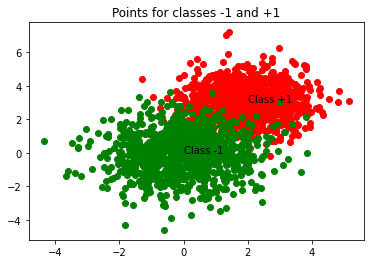

<Figure size 720x576 with 0 Axes>

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(3)
x_train_positive=[]
x_m = 2
y_m = 3
s = 1 
for i in range(1000):
        x1 = x_m + s*np.random.normal(0,1)
        x2 = y_m + s*np.random.normal(0,1)
        x_train_positive.append((x1,x2))

x_train_negative=[]
x_m = 0
y_m = 0
s = 1.2
for i in range(1000):
        x1 = x_m + s*np.random.normal(0,1)
        x2 = y_m + s*np.random.normal(0,1)
        x_train_negative.append((x1,x2))


x_train = x_train_positive + x_train_negative
y_train = len(x_train_positive)*[+1] + len(x_train_negative)*[-1]
x1 = [x_train_positive[i][0] for i in range(len(x_train_positive))]
x2 = [x_train_positive[i][1] for i in range(len(x_train_positive))]
plt.scatter(x1,x2,c="red")
plt.text(2,3,"Class +1")
p1 = [x_train_negative[i][0] for i in range(len(x_train_negative))]
p2 = [x_train_negative[i][1] for i in range(len(x_train_negative))]
plt.scatter(p1,p2,c="green")
plt.text(0,0,"Class -1")
plt.title("Points for classes -1 and +1")
plt.figure(figsize=(10,8))
plt.show